<a href="https://colab.research.google.com/github/HlibBorovko/KSVD/blob/main/%D0%91%D0%BE%D1%80%D0%BE%D0%B2%D0%BA%D0%BE_%D0%93%D0%BB%D1%96%D0%B1_4_6_%D0%9A%D0%A1%D0%92%D0%94_%D0%BB%D0%B12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np


In [23]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from google.colab import files

In [24]:
# Завантаження датасету
uploaded = files.upload()
df = pd.read_csv('heart.csv')

Saving heart.csv to heart (2).csv


In [25]:
# Попередній аналіз
print("Інформація про датафрейм:")
print(df.info())

print("\nКількість дублікатів:", df.duplicated().sum())
df.drop_duplicates(inplace=True)

print("\nПеревірка на пропущені значення:")
print(df.isnull().sum())

print("\nОписова статистика:")
print(df.describe())

Інформація про датафрейм:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       5000 non-null   float64
 1   anaemia                   5000 non-null   int64  
 2   creatinine_phosphokinase  5000 non-null   int64  
 3   diabetes                  5000 non-null   int64  
 4   ejection_fraction         5000 non-null   int64  
 5   high_blood_pressure       5000 non-null   int64  
 6   platelets                 5000 non-null   float64
 7   serum_creatinine          5000 non-null   float64
 8   serum_sodium              5000 non-null   int64  
 9   sex                       5000 non-null   int64  
 10  smoking                   5000 non-null   int64  
 11  time                      5000 non-null   int64  
 12  DEATH_EVENT               5000 non-null   int64  
dtypes: float64(3), int64(10)
memory usage

In [26]:
df.duplicated().sum()



np.int64(0)

In [27]:
df.drop_duplicates(inplace=True)

In [29]:
print(df.columns)

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')


In [34]:
X = df.drop('DEATH_EVENT', axis=1)
y = df['DEATH_EVENT']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [35]:
# Побудова логістичної регресії
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [36]:
# Метрики
print("\nОцінка моделі:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))



Оцінка моделі:
Accuracy: 0.8257575757575758

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.90      0.88       194
           1       0.69      0.63      0.66        70

    accuracy                           0.83       264
   macro avg       0.78      0.76      0.77       264
weighted avg       0.82      0.83      0.82       264



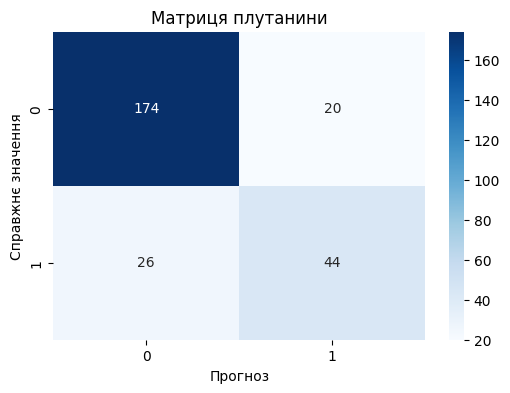

In [37]:
# Матриця плутанини
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Матриця плутанини")
plt.xlabel("Прогноз")
plt.ylabel("Справжнє значення")
plt.show()

In [39]:
# Графіки точності і функції втрат вручну
loss_values = []
accuracy_values = []

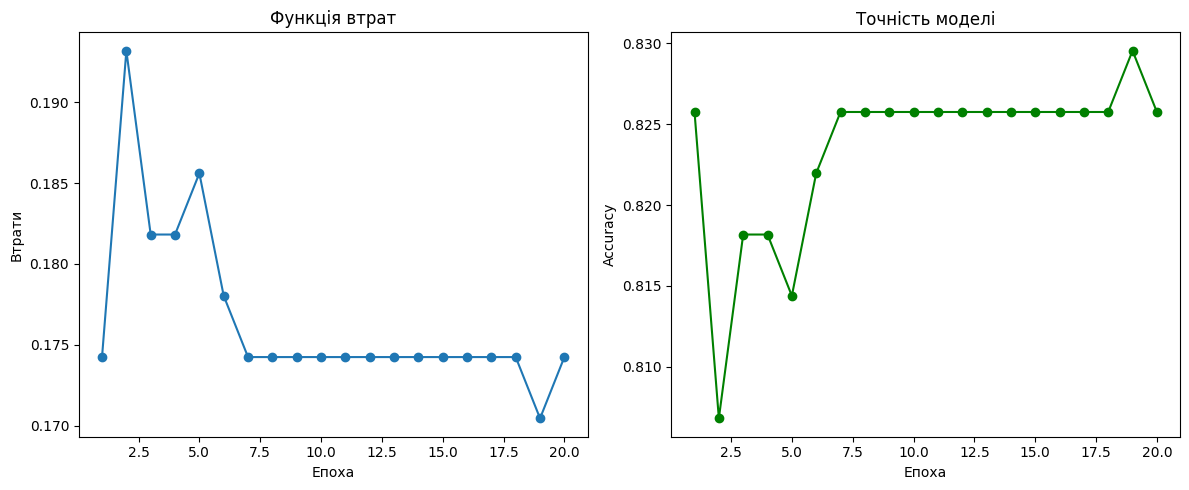

In [41]:
# Побудова графіків
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(range(1, 21), loss_values, marker='o')
plt.title("Функція втрат")
plt.xlabel("Епоха")
plt.ylabel("Втрати")

plt.subplot(1, 2, 2)
plt.plot(range(1, 21), accuracy_values, marker='o', color='green')
plt.title("Точність моделі")
plt.xlabel("Епоха")
plt.ylabel("Accuracy")

plt.tight_layout()
plt.show()

**Висновок**
У завданні була побудована модель логістичної регресії для прогнозування ймовірності смерті на основі медичних даних. Спочатку був проведений аналіз даних (перевірка на дублікати, пропущені значення), після чого модель навчалась на тренувальних даних та перевірялась на тестових. Оцінка результатів проводилася за допомогою метрик точності, precision, recall та F1-score, а також матриці плутанини для виявлення помилок.